In [1]:
# Import required libraries
from scipy import special as sp
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.mie_functions import *

In [2]:
# Import wavelength and refractive index values
ref_lam_gold, ref_n_gold, ref_k_gold = import_data("McPeak_gold.csv")
m_gold = ref_n_gold + 1j * ref_k_gold 

In [3]:
# Define radii and respective coordinate arrays for plotting
r1 = 0.01 #micrometers
r2 = 0.02 #micrometers
r3 = 0.03 #micrometers
r4 = 0.045 #micrometers
r5 = 0.06 #micrometers

x_arr1 = np.linspace(1.0, 2.0, 1000) * r1 * 1e3  #nm
x_arr2 = np.linspace(1.0, 2.0, 1000) * r2 * 1e3  #nm
x_arr3 = np.linspace(1.0, 2.0, 1000) * r3 * 1e3  #nm
x_arr4 = np.linspace(1.0, 2.0, 1000) * r4 * 1e3  #nm
x_arr5 = np.linspace(1.0, 2.0, 1000) * r5 * 1e3  #nm

y_arr = np.array([0.0]) #nm

r_arr1 = np.sqrt(x_arr1**2 + np.ones_like(x_arr1)*y_arr[0]**2) #nm
r_arr2 = np.sqrt(x_arr2**2 + np.ones_like(x_arr2)*y_arr[0]**2) #nm
r_arr3 = np.sqrt(x_arr3**2 + np.ones_like(x_arr3)*y_arr[0]**2) #nm
r_arr4 = np.sqrt(x_arr4**2 + np.ones_like(x_arr4)*y_arr[0]**2) #nm
r_arr5 = np.sqrt(x_arr5**2 + np.ones_like(x_arr5)*y_arr[0]**2) #nm

### Finding the resonant wavelength of nanoparticles of three different diameters

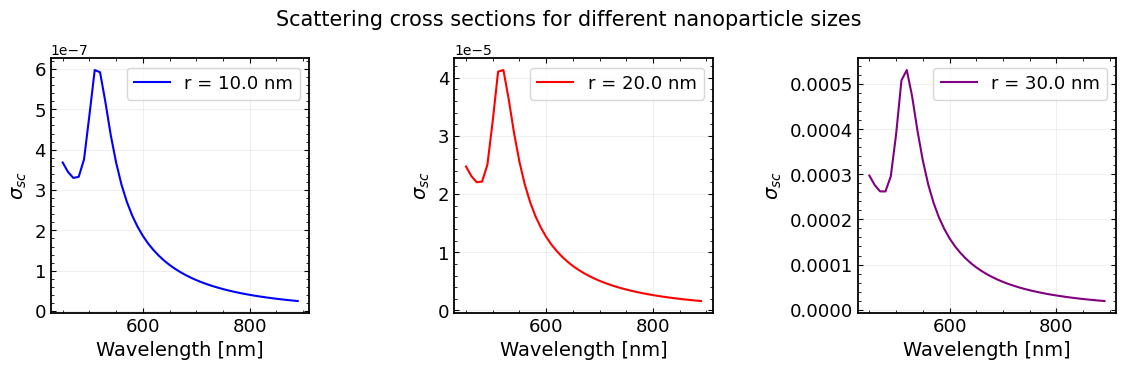

Resonant wavelength for r = 10.0 nm: 510.0 nm
Resonant wavelength for r = 20.0 nm: 520.0 nm
Resonant wavelength for r = 30.0 nm: 520.0 nm
Resonant wavelength for r = 45.0 nm: 520.0 nm
Resonant wavelength for r = 60.0 nm: 520.0 nm


In [4]:
# Calculate A1 and B1 Mie coeffs for given radii
A_r1, B_r1 = a_1_b_1_lists(ref_ind = m_gold, lam_list = ref_lam_gold, r = r1, YSK = True)
A_r2, B_r2 = a_1_b_1_lists(ref_ind = m_gold, lam_list = ref_lam_gold, r = r2, YSK = True)
A_r3, B_r3 = a_1_b_1_lists(ref_ind = m_gold, lam_list = ref_lam_gold, r = r3, YSK = True)
A_r4, B_r4 = a_1_b_1_lists(ref_ind = m_gold, lam_list = ref_lam_gold, r = r4, YSK = True)
A_r5, B_r5 = a_1_b_1_lists(ref_ind = m_gold, lam_list = ref_lam_gold, r = r4, YSK = True)
# Calculate scattering cross-section using Mie coeffs from lines above
sca_cross_section_r1 = sca_cross_section_analytical(A_r1, B_r1, ref_lam_gold) 
sca_cross_section_r2 = sca_cross_section_analytical(A_r2, B_r2, ref_lam_gold) 
sca_cross_section_r3 = sca_cross_section_analytical(A_r3, B_r3, ref_lam_gold) 
sca_cross_section_r4 = sca_cross_section_analytical(A_r4, B_r4, ref_lam_gold) 
sca_cross_section_r5 = sca_cross_section_analytical(A_r5, B_r5, ref_lam_gold) 
# Plot scattering cross-sections (restrict plotted vals so that maximum is easy to extract)
general_plot_style([ref_lam_gold[15:60]*1e3, ref_lam_gold[15:60]*1e3, ref_lam_gold[15:60]*1e3], 
                   [sca_cross_section_r1[15:60], sca_cross_section_r2[15:60], sca_cross_section_r3[15:60]], 
                   legendlabels = [f'r = {r1*1e3} nm', f'r = {r2*1e3} nm', f'r = {r3*1e3} nm'], 
                   colors = ['blue', 'red', 'purple'], ls = ['solid', 'solid', 'solid'], figsize = [12,4],
                   subplots = [1,3], xlabel = 'Wavelength [nm]', ylabel = '$\sigma_{sc}$', 
                   title = 'Scattering cross sections for different nanoparticle sizes', 
                   filename = 'scat_cross_sections.jpg', savefig = True)
# Find wavelength resulting in maximum scattering cross-section
lam1 = ref_lam_gold[np.where(sca_cross_section_r1 == np.max(sca_cross_section_r1[15:60]))][0]
lam2 = ref_lam_gold[np.where(sca_cross_section_r2 == np.max(sca_cross_section_r2[15:60]))][0]
lam3 = ref_lam_gold[np.where(sca_cross_section_r3 == np.max(sca_cross_section_r3[15:60]))][0]
lam4 = ref_lam_gold[np.where(sca_cross_section_r4 == np.max(sca_cross_section_r4[15:60]))][0]
lam5 = ref_lam_gold[np.where(sca_cross_section_r5 == np.max(sca_cross_section_r5[15:60]))][0]
# Print wavelength resulting in maximum scattering cross-section
print(f'Resonant wavelength for r = {r1*1e3} nm: {lam1*1e3} nm')
print(f'Resonant wavelength for r = {r2*1e3} nm: {lam2*1e3} nm')
print(f'Resonant wavelength for r = {r3*1e3} nm: {lam3*1e3} nm')
print(f'Resonant wavelength for r = {r4*1e3} nm: {lam4*1e3} nm')
print(f'Resonant wavelength for r = {r5*1e3} nm: {lam5*1e3} nm')

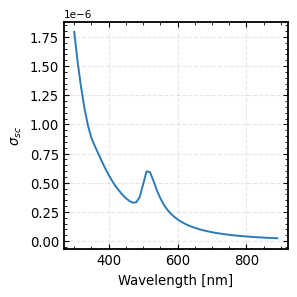

In [5]:
# Same plot without restricted axis values for pdf file with plots (r = 10 nm)
col = ['#d7191c', '#fdae61', '#abd9e9', '#2c7bb6']
plt.rc('font', **{'size':'7.5'})
plt.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(1,1, figsize = (3, 3), layout = 'tight')
ax.plot(ref_lam_gold[:60]*1e3, sca_cross_section_r1[:60], color = col[-1], ls = 'solid', linewidth = 1.4)
# Plotting style
for w in range(2):
    ax.set_xlabel('Wavelength [nm]', fontsize=9.5)
    ax.set_ylabel('$\sigma_{sc}$', fontsize=9.5)
    ax.minorticks_on()
    ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
    ax.grid(alpha = 0.3, ls = '--')
# Save plot    
plt.savefig(fname = f'scat_cross_section_r_{r1*1e3:.0f}.jpg', format = 'jpg', dpi=600)
plt.show()

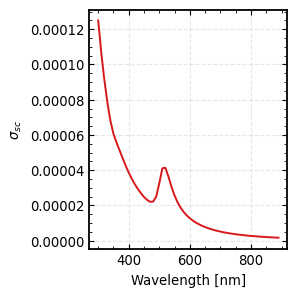

In [6]:
# Same plot without restricted axis values for pdf file with plots (r = 45 nm)
fig, ax = plt.subplots(1,1, figsize = (3, 3), layout = 'tight')
ax.plot(ref_lam_gold[:60]*1e3, sca_cross_section_r2[:60], color = col[0], ls = 'solid', linewidth = 1.4)
# Plotting style
for w in range(2):
    ax.set_xlabel('Wavelength [nm]', fontsize=9.5)
    ax.set_ylabel('$\sigma_{sc}$', fontsize=9.5)
    ax.minorticks_on()
    ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
    ax.grid(alpha = 0.3, ls = '--')
# Save plot        
plt.savefig(fname = f'scat_cross_section_r_{r2*1e3:.0f}.jpg', format = 'jpg', dpi=600)

### Maximum field enhancement for nanoparticles of three different diameters

(incident field at resonant wavelength)

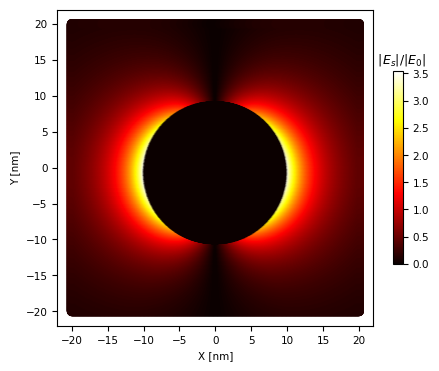

('At incoming wavelength of 510.0 nm',
 'Maximum scattered field = 3.5374865880646986 E_0')

In [7]:
# r = 10 nm, resonant wavelength = 510 nm (TAKES LONG TO RUN, 1080 resolution required to get background in inset,
#                                          can be turned off with inset = False)
x_vals = np.linspace(-2*r1*1e3,2*r1*1e3,1080) #nm
y_vals = np.linspace(-2*r1*1e3,2*r1*1e3,1080) #nm

plot_scattered_field(x_vals, y_vals, 1e-15, m_gold, lam_list = ref_lam_gold, lam_value = lam1, r = r1, 
                     filename = 'enhancement_r_10.txt', n = 1, figsize = [5.1,5], savefig = True, dist = 0.2e-9)

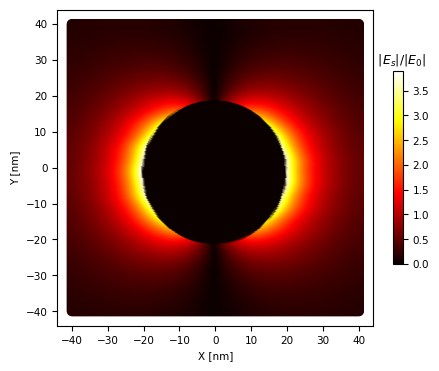

('At incoming wavelength of 520.0 nm',
 'Maximum scattered field = 3.8922041562405147 E_0')

In [8]:
# r = 20 nm, resonant wavelength = 520 nm
x_vals = np.linspace(-2*r2*1e3,2*r2*1e3,300) #nm
y_vals = np.linspace(-2*r2*1e3,2*r2*1e3,300) #nm

plot_scattered_field(x_vals, y_vals, 1e-15, m_gold, lam_list = ref_lam_gold, lam_value = lam2, r = r2, 
                     filename = 'enhancement_r_20.txt', n = 1, figsize = [5.1,5], savefig = True)

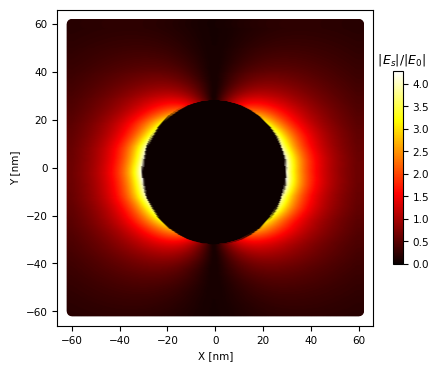

('At incoming wavelength of 520.0 nm',
 'Maximum scattered field = 4.274597991734199 E_0')

In [9]:
# r = 30 nm, resonant wavelength = 520 nm
x_vals = np.linspace(-2*r3*1e3,2*r3*1e3,300) #nm
y_vals = np.linspace(-2*r3*1e3,2*r3*1e3,300) #nm

plot_scattered_field(x_vals, y_vals, 1e-15, m_gold, lam_list = ref_lam_gold, lam_value = lam3, r = r3, 
                     filename = 'enhancement_r_30.txt', n = 1, figsize = [5.1,5])

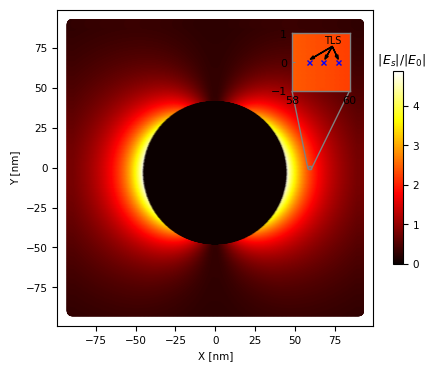

('At incoming wavelength of 520.0 nm',
 'Maximum scattered field = 4.863121465069937 E_0')

In [14]:
# r = 45 nm, resonant wavelength = 520 nm (TAKES LONG TO RUN, 1080 resolution required to get background in inset,
#                                          can be turned off with inset = False)
x_vals = np.linspace(-2*r4*1e3,2*r4*1e3,1080) #nm
y_vals = np.linspace(-2*r4*1e3,2*r4*1e3,1080) #nm

plot_scattered_field(x_vals, y_vals, 1e-15, m_gold, lam_list = ref_lam_gold, lam_value = lam4, r = r4, 
                     filename = 'enhancement_r_45.txt', n = 1, figsize = [5.1,5], inset = True,
                     savefig = True, dist = 0.9e-9)

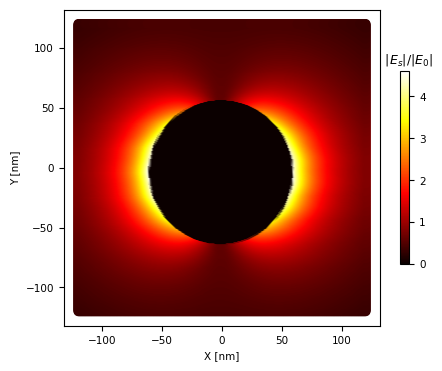

('At incoming wavelength of 520.0 nm',
 'Maximum scattered field = 4.597660508707109 E_0')

In [15]:
# r = 60 nm, resonant wavelength = 520 nm
x_vals = np.linspace(-2*r5*1e3,2*r5*1e3,300) #nm
y_vals = np.linspace(-2*r5*1e3,2*r5*1e3,300) #nm

plot_scattered_field(x_vals, y_vals, 1e-15, m_gold, lam_list = ref_lam_gold, lam_value = lam5, r = r5, 
                     filename = 'enhancement_r_60.txt', n = 1, figsize = [5.1,5])

### Rabi frequency and decay rates of the TLS 
(as a function of distance from the surface of the nanosphere)

Max Rabi freq at 11.021 nm for E_0 = 0.045, radius r = 10 nm
Max Rabi freq at 21.802 nm for E_0 = 0.04, radius r = 20 nm
Max Rabi freq at 33.874 nm for E_0 = 0.04, radius r = 30 nm
Max Rabi freq at 50.180 nm for E_0 = 0.035, radius r = 45 nm


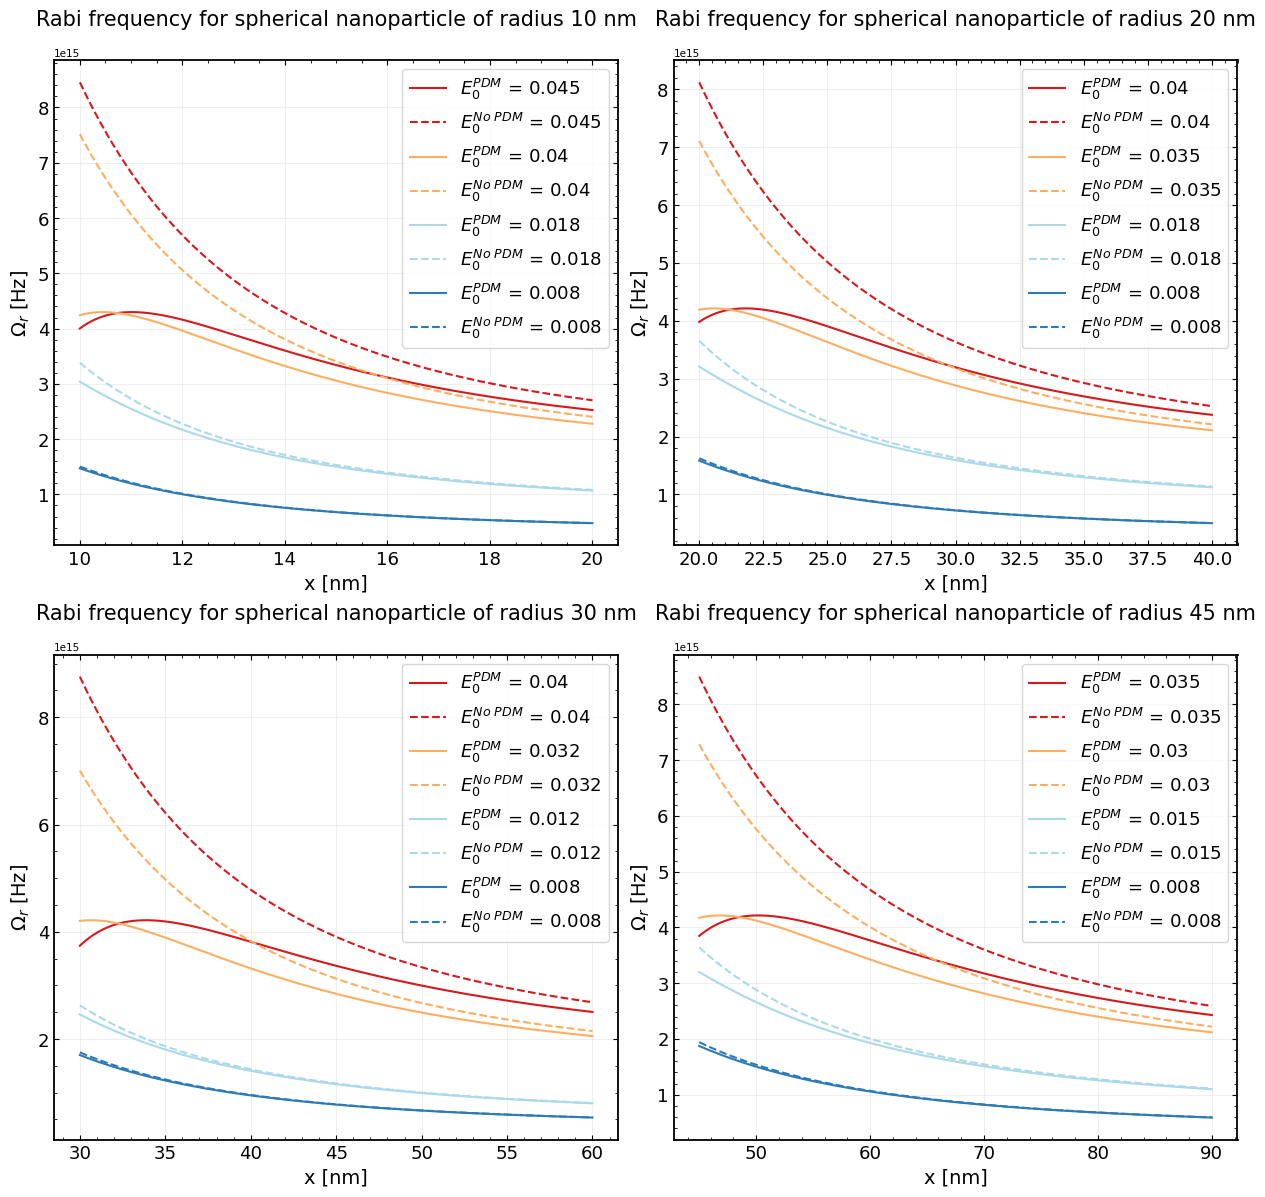

In [16]:
# Calculate Rabi frequency for all 5 nanoparticle radii [r1...r5] for different E0 values and fixed dperm = 1. 
# J_factors are the Bessel function corrections, omega_np are the Rabi frequencies without that 
# correction and omega are the full Rabi freq values. E is the field value in SI units.

E0s1 = [0.045, 0.040, 0.018, 0.008]
J_factor01, E01, omega_np01, omega01 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r1, 
                                                      n = 1, lam_value = lam1, E_0 = E0s1[0], print_vals = False)
J_factor11, E11, omega_np11, omega11 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r1, 
                                                      n = 1, lam_value = lam1, E_0 = E0s1[1], print_vals = False)
J_factor21, E21, omega_np21, omega21 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r1, 
                                                      n = 1, lam_value = lam1, E_0 = E0s1[2], print_vals = False)
J_factor31, E31, omega_np31, omega31 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r1, 
                                                      n = 1, lam_value = lam1, E_0 = E0s1[3], print_vals = False)
omega1 = [omega01, omega11, omega21, omega31] # store values including Bessel correction for plotting
omeganp1 = [omega_np01, omega_np11, omega_np21, omega_np31] # store values without Bessel correction for plotting
                                                            # (correction is J_1^2(kappa) with kappa = 0 when dperm 0)
E0s2 = [0.04, 0.035, 0.018, 0.008]
J_factor02, E02, omega_np02, omega02 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r2, 
                                                      n = 1, lam_value = lam2, E_0 = E0s2[0], print_vals = False)
J_factor12, E12, omega_np12, omega12 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r2,
                                                      n = 1, lam_value = lam2, E_0 = E0s2[1], print_vals = False)
J_factor22, E22, omega_np22, omega22 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r2, 
                                                      n = 1, lam_value = lam2, E_0 = E0s2[2], print_vals = False)
J_factor32, E32, omega_np32, omega32 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r2, 
                                                      n = 1, lam_value = lam2, E_0 = E0s2[3], print_vals = False)
omega2 = [omega02, omega12, omega22, omega32] # store values including Bessel correction for plotting
omeganp2 = [omega_np02, omega_np12, omega_np22, omega_np32] # store values without Bessel correction for plotting
 
E0s3 = [0.04, 0.032, 0.012, 0.008]
J_factor03, E03, omega_np03, omega03 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r3, 
                                                      n = 1, lam_value = lam3, E_0 = E0s3[0], print_vals = False)
J_factor13, E13, omega_np13, omega13 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r3, 
                                                      n = 1, lam_value = lam3, E_0 = E0s3[1], print_vals = False)
J_factor23, E23, omega_np23, omega23 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r3, 
                                                      n = 1, lam_value = lam3, E_0 = E0s3[2], print_vals = False)
J_factor33, E33, omega_np33, omega33 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r3,
                                                      n = 1, lam_value = lam3, E_0 = E0s3[3], print_vals = False)
omega3 = [omega03, omega13, omega23, omega33] # store values including Bessel correction for plotting
omeganp3 = [omega_np03, omega_np13, omega_np23, omega_np33] # store values without Bessel correction for plotting

E0s4 = [0.035, 0.03, 0.015, 0.008]
J_factor04, E04, omega_np04, omega04 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r4, 
                                                      n = 1, lam_value = lam4, E_0 = E0s4[0], print_vals = False)
J_factor14, E14, omega_np14, omega14 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r4, 
                                                      n = 1, lam_value = lam4, E_0 = E0s4[1], print_vals = False)
J_factor24, E24, omega_np24, omega24 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r4, 
                                                      n = 1, lam_value = lam4, E_0 = E0s4[2], print_vals = False)
J_factor34, E34, omega_np34, omega34 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_gold, lam_list = ref_lam_gold, r = r4, 
                                                      n = 1, lam_value = lam4, E_0 = E0s4[3], print_vals = False)
omega4 = [omega04, omega14, omega24, omega34] # store values including Bessel correction for plotting
omeganp4 = [omega_np04, omega_np14, omega_np24, omega_np34] # store values without Bessel correction for plotting

#Plotting
st1 = '$E_0^{PDM}$' #used for plot labels
st2 = '$E_0^{No \,\, PDM}$' #used for plot labels
col = ['#d7191c', '#fdae61', '#abd9e9', '#2c7bb6']
col1 = ['#d7191c', '#fdae61', '#2c7bb6', '#313695']
fig, ax = plt.subplots(2,2, figsize = (12.5, 12), layout = 'tight')
#On each subplot, plot Rabi freqeuncies with and without PDM for all E_0 values
for q in range(4):
    ax[0,0].plot(r_arr1, omega1[q], label = f'{st1} = {E0s1[q]}', color = col[q], ls = 'solid')
    ax[0,0].plot(r_arr1, omeganp1[q], label = f'{st2} = {E0s1[q]}', color = col[q], ls = '--')
    ax[0,1].plot(r_arr2, omega2[q], label = f'{st1} = {E0s2[q]}', color = col[q], ls = 'solid')
    ax[0,1].plot(r_arr2, omeganp2[q], label = f'{st2} = {E0s2[q]}', color = col[q], ls = '--')
    ax[1,0].plot(r_arr3, omega3[q], label = f'{st1} = {E0s3[q]}', color = col[q], ls = 'solid')
    ax[1,0].plot(r_arr3, omeganp3[q], label = f'{st2} = {E0s3[q]}', color = col[q], ls = '--')
    ax[1,1].plot(r_arr4, omega4[q], label = f'{st1} = {E0s4[q]}', color = col[q], ls = 'solid')
    ax[1,1].plot(r_arr4, omeganp4[q], label = f'{st2} = {E0s4[q]}', color = col[q], ls = '--')  
#Plotting style    
for v in range(2):
    for w in range(2):
        ax[v,w].set_xlabel('x [nm]', fontsize=14)
        ax[v,w].set_ylabel('$\Omega_r$ [Hz]', fontsize=14)
        ax[v,w].minorticks_on()
        ax[v,w].tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=13)
        for axis in ['top','bottom','left','right']:
            ax[v,w].spines[axis].set_linewidth(1.3)
        ax[v,w].grid(alpha = 0.2)
        ax[v,w].legend(fontsize=13)
ax[0,0].set_title(f'Rabi frequency for spherical nanoparticle of radius {r1*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)
ax[0,1].set_title(f'Rabi frequency for spherical nanoparticle of radius {r2*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)
ax[1,0].set_title(f'Rabi frequency for spherical nanoparticle of radius {r3*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)
ax[1,1].set_title(f'Rabi frequency for spherical nanoparticle of radius {r4*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)
#Calculate position of Rabi freq maximum
d_1 = r_arr1[np.where(omega01 == np.max(omega01))]
d_2 = r_arr2[np.where(omega02 == np.max(omega02))]
d_3 = r_arr3[np.where(omega03 == np.max(omega03))]
d_4 = r_arr4[np.where(omega04 == np.max(omega04))]
#Print position of Rabi freq maximum
print(f'Max Rabi freq at {d_1[0]:.3f} nm for E_0 = {E0s1[0]}, radius r = {r1*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_2[0]:.3f} nm for E_0 = {E0s2[0]}, radius r = {r2*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_3[0]:.3f} nm for E_0 = {E0s3[0]}, radius r = {r3*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_4[0]:.3f} nm for E_0 = {E0s4[0]}, radius r = {r4*1e3:.0f} nm' )

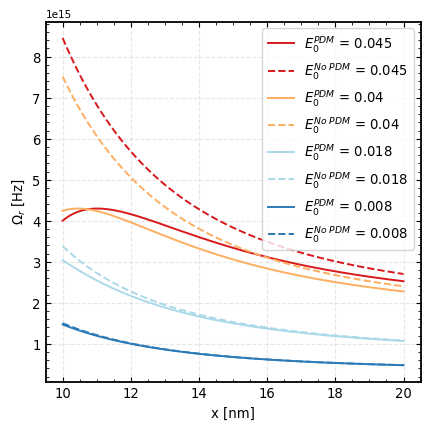

In [17]:
# r = 10 nm. Plot only the values for r = 10 nm and save plot for pdf document
st1 = '$E_0^{PDM}$' # used for plot labels
st2 = '$E_0^{No \,\, PDM}$' # used for plot labels
col = ['#d7191c', '#fdae61', '#abd9e9', '#2c7bb6']
col1 = ['#d7191c', '#fdae61', '#2c7bb6', '#313695']
cm = 1/2.54 # used for figsize
plt.rc('font', **{'size':'7.5'})
plt.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(1,1, figsize = (11*cm, 11*cm), layout = 'tight')
for q in range(4):
    ax.plot(r_arr1, omega1[q], label = f'{st1} = {E0s1[q]}', color = col[q], ls = 'solid', linewidth = 1.4)
    ax.plot(r_arr1, omeganp1[q], label = f'{st2} = {E0s1[q]}', color = col[q], ls = '--', linewidth = 1.4)
# Plotting style    
ax.set_xlabel('x [nm]', fontsize=9.5)
ax.set_ylabel('$\Omega_r$ [Hz]', fontsize=9.5)
ax.minorticks_on()
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.grid(alpha = 0.3, ls = '--')
ax.legend(fontsize=9.5)
# Save plot    
plt.savefig(fname = f'rabi_freq_wrt_field_r_{r1*1e3:.0f}.jpg', format = 'jpg', dpi=800)

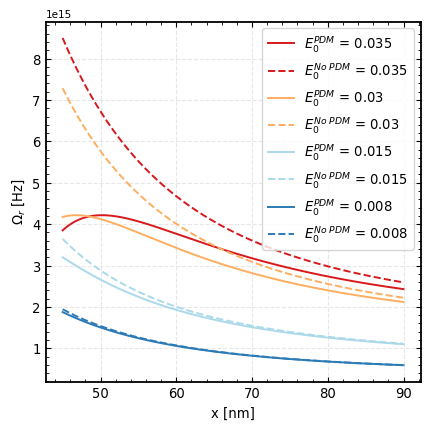

In [18]:
# r = 45 nm. Plot only the values for r = 45 nm and save plot for pdf document
cm = 1/2.54 #used for figsize
fig, ax = plt.subplots(1,1, figsize = (11*cm, 11*cm), layout = 'tight')
for q in range(4):
    ax.plot(r_arr4, omega4[q], label = f'{st1} = {E0s4[q]}', color = col[q], ls = 'solid', linewidth = 1.4)
    ax.plot(r_arr4, omeganp4[q], label = f'{st2} = {E0s4[q]}', color = col[q], ls = '--', linewidth = 1.4)
# Plotting style        
for w in range(2):
    ax.set_xlabel('x [nm]', fontsize=9.5)
    ax.set_ylabel('$\Omega_r$ [Hz]', fontsize=9.5)
    ax.minorticks_on()
    ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.3)
    ax.grid(alpha = 0.3, ls = '--')
    ax.legend(fontsize=9.5)
# Save plot    
plt.savefig(fname = f'rabi_freq_wrt_field_r_{r4*1e3:.0f}.jpg', format = 'jpg', dpi=800)

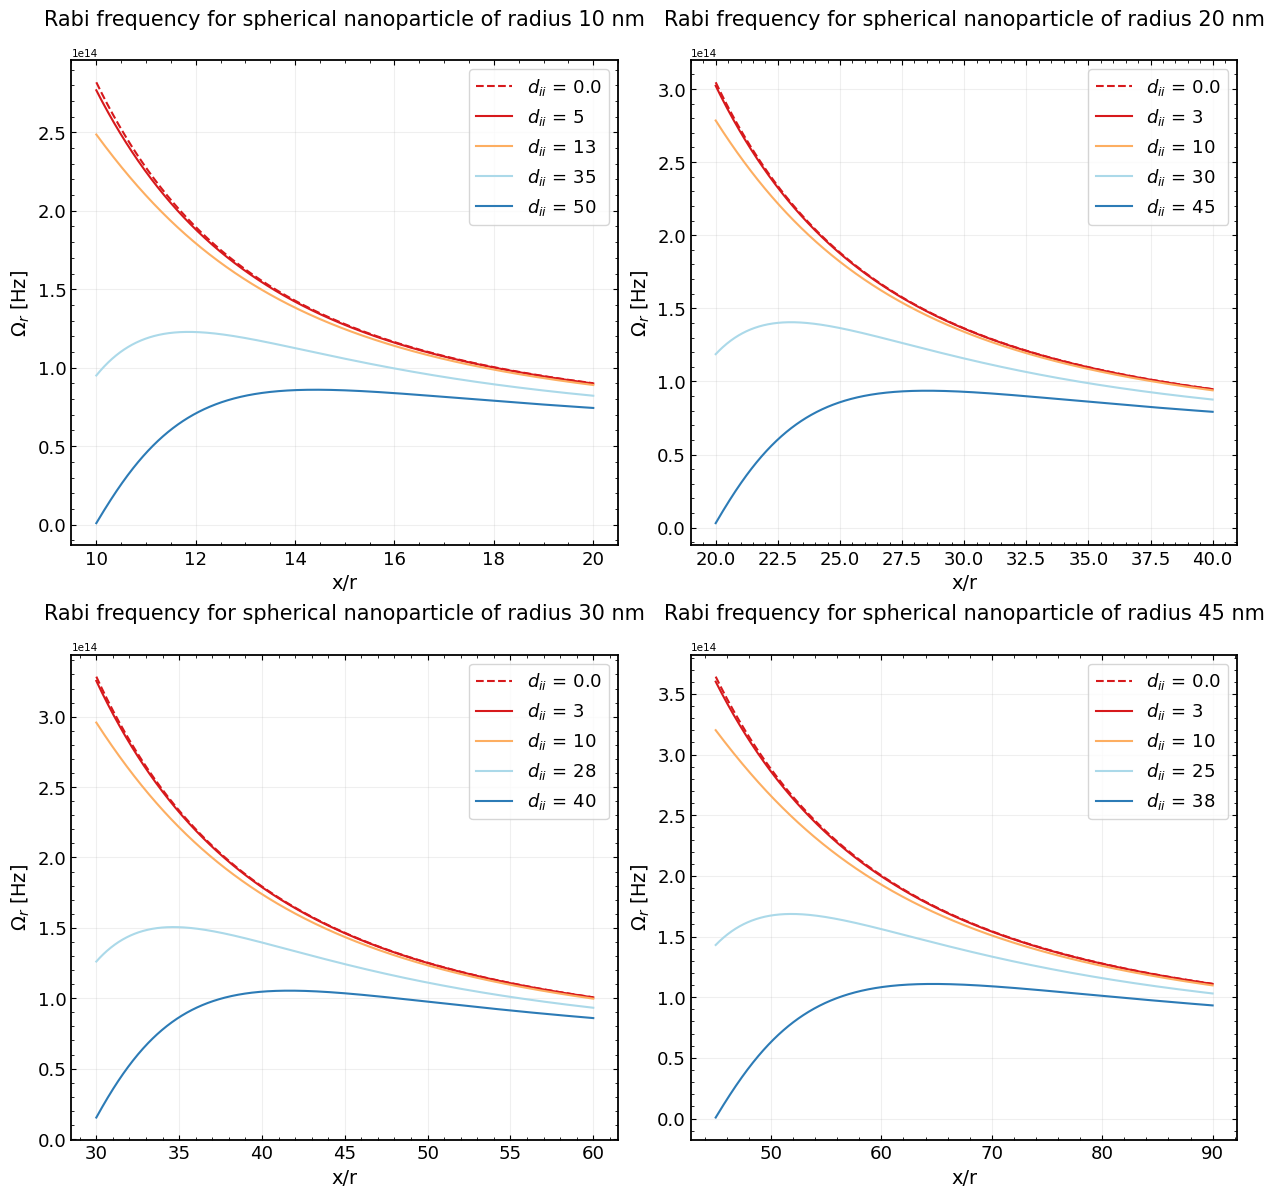

Max Rabi freq at 11.862 nm for E_0 = 0.0015, d_ii = 35, radius r = 10 nm
Max Rabi freq at 14.414 nm for E_0 = 0.0015, d_ii = 50, radius r = 10 nm
Max Rabi freq at 23.023 nm for E_0 = 0.0015, d_ii = 30, radius r = 20 nm
Max Rabi freq at 28.509 nm for E_0 = 0.0015, d_ii = 45, radius r = 20 nm
Max Rabi freq at 34.655 nm for E_0 = 0.0015, d_ii = 28, radius r = 30 nm
Max Rabi freq at 41.652 nm for E_0 = 0.0015, d_ii = 40, radius r = 30 nm
Max Rabi freq at 51.847 nm for E_0 = 0.0015, d_ii = 25, radius r = 45 nm
Max Rabi freq at 64.685 nm for E_0 = 0.0015, d_ii = 38, radius r = 45 nm
Max Rabi freq at 52.162 nm for E_0 = 0.0015, d_ii = 26, radius r = 60 nm
Max Rabi freq at 61.396 nm for E_0 = 0.0015, d_ii = 35, radius r = 60 nm


In [24]:
# Calculate Rabi frequency for all 5 nanoparticle radii [r1...r5] for different dperm values and fixed field 
# intensity. J_factors are the Bessel function corrections, omega_np are the Rabi frequencies without that 
# correction and omega are the full Rabi freq values. E is the field value in SI units.

E_0_fixed = 0.0015
d_ii_1 = [0.0, 5, 13, 35, 50] #Uncomment for time evolution and Rabi frequency plots (best values)
#d_ii_1 = [0.0, 25, 30, 35, 40] #Uncomment for coherence time plots

# r = 10 nm
J_factor05, E05, omega_np05, omega05 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_1[1], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r1, n = 1, lam_value = lam1, E_0 = E_0_fixed)
J_factor15, E15, omega_np15, omega15 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_1[2], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r1, n = 1, lam_value = lam1, E_0 = E_0_fixed)
J_factor25, E25, omega_np25, omega25 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_1[3], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r1, n = 1, lam_value = lam1, E_0 = E_0_fixed)
J_factor35, E35, omega_np35, omega35 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_1[4], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r1, n = 1, lam_value = lam1, E_0 = E_0_fixed)
omega5 = [omega_np05, omega05, omega15, omega25, omega35] # store Rabi freq values for plotting

# r = 20 nm
d_ii_2 = [0.0, 3, 10, 30, 45]
J_factor06, E06, omega_np06, omega06 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_2[1], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r2, n = 1, lam_value = lam2, E_0 = E_0_fixed)
J_factor16, E16, omega_np16, omega16 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_2[2], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r2, n = 1, lam_value = lam2, E_0 = E_0_fixed)
J_factor26, E26, omega_np26, omega26 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_2[3], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r2, n = 1, lam_value = lam2, E_0 = E_0_fixed)
J_factor36, E36, omega_np36, omega36 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_2[4], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r2, n = 1, lam_value = lam2, E_0 = E_0_fixed)
omega6 = [omega_np06, omega06, omega16, omega26, omega36] # store Rabi freq values for plotting

# r = 30 nm
d_ii_3 = [0.0, 3, 10, 28, 40]
J_factor07, E07, omega_np07, omega07 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_3[1], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r3, n = 1, lam_value = lam3, E_0 = E_0_fixed)
J_factor17, E17, omega_np17, omega17 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_3[2], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r3, n = 1, lam_value = lam3, E_0 = E_0_fixed)
J_factor27, E27, omega_np27, omega27 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_3[3], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r3, n = 1, lam_value = lam3, E_0 = E_0_fixed)
J_factor37, E37, omega_np37, omega37 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_3[4], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r3, n = 1, lam_value = lam3, E_0 = E_0_fixed)
omega7 = [omega_np07, omega07, omega17, omega27, omega37] # store Rabi freq values for plotting

# r = 45 nm
d_ii_4 = [0.0, 3, 10, 25, 38] #Uncomment for time evolution and Rabi frequency plots (best values)
#d_ii_4 = [0.0, 25, 30, 35, 40] #Uncomment for coherence time plots

J_factor08, E08, omega_np08, omega08 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_4[1], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r4, n = 1, lam_value = lam4, E_0 = E_0_fixed)
J_factor18, E18, omega_np18, omega18 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_4[2], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r4, n = 1, lam_value = lam4, E_0 = E_0_fixed)
J_factor28, E28, omega_np28, omega28 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_4[3], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r4, n = 1, lam_value = lam4, E_0 = E_0_fixed)
J_factor38, E38, omega_np38, omega38 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_4[4], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r4, n = 1, lam_value = lam4, E_0 = E_0_fixed,)
omega8 = [omega_np08, omega08, omega18, omega28, omega38] # store Rabi freq values for plotting

# r = 60 nm
d_ii_5 = [0.0, 3, 10, 26, 35]
J_factor09, E09, omega_np09, omega09 = rabi_frequency(x_points = x_arr5, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_5[1], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r5, n = 1, lam_value = lam5, E_0 = E_0_fixed)
J_factor19, E19, omega_np19, omega19 = rabi_frequency(x_points = x_arr5, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_5[2], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r5, n = 1, lam_value = lam5, E_0 = E_0_fixed)
J_factor29, E29, omega_np29, omega29 = rabi_frequency(x_points = x_arr5, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_5[3], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r5, n = 1, lam_value = lam5, E_0 = E_0_fixed)
J_factor39, E39, omega_np39, omega39 = rabi_frequency(x_points = x_arr5, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_5[4], refr_ind = m_gold, lam_list = ref_lam_gold, 
                                                      r = r5, n = 1, lam_value = lam5, E_0 = E_0_fixed,)
omega9 = [omega_np09, omega09, omega19, omega29, omega39] # store Rabi freq values for plotting

#Plotting
st = '$d_{ii}$' #used for plot labels
fig, ax = plt.subplots(2,2, figsize = (12.5, 12), layout = 'tight')
lss = ['--', 'solid', 'solid', 'solid', 'solid']
col2 = ['#d7191c', '#d7191c', '#fdae61', '#abd9e9', '#2c7bb6']
#On each of the four subplots, plot the rabi frequency values for radii r1 to r4 
for q in range(5):
    ax[0,0].plot(r_arr1, omega5[q], label = f'{st} = {d_ii_1[q]}', color = col2[q], ls = lss[q])
    ax[0,1].plot(r_arr2, omega6[q], label = f'{st} = {d_ii_2[q]}', color = col2[q], ls = lss[q])
    ax[1,0].plot(r_arr3, omega7[q], label = f'{st} = {d_ii_3[q]}', color = col2[q], ls = lss[q])
    ax[1,1].plot(r_arr4, omega8[q], label = f'{st} = {d_ii_4[q]}', color = col2[q], ls = lss[q])
#Plotting style    
for v in range(2):
    for w in range(2):
        ax[v,w].set_xlabel('x/r', fontsize=14)
        ax[v,w].set_ylabel('$\Omega_r$ [Hz]', fontsize=14)
        ax[v,w].minorticks_on()
        ax[v,w].tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=13)
        for axis in ['top','bottom','left','right']:
            ax[v,w].spines[axis].set_linewidth(1.3)
        ax[v,w].grid(alpha = 0.2)
        ax[v,w].legend(fontsize=13)
ax[0,0].set_title(f'Rabi frequency for spherical nanoparticle of radius {r1*1e3:.0f} nm', fontsize=15, \
                  wrap = True, pad = 25)
ax[0,1].set_title(f'Rabi frequency for spherical nanoparticle of radius {r2*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)
ax[1,0].set_title(f'Rabi frequency for spherical nanoparticle of radius {r3*1e3:.0f} nm', fontsize=15, \
                  wrap = True, pad = 25)
ax[1,1].set_title(f'Rabi frequency for spherical nanoparticle of radius {r4*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)
#Find x-distance (at y=0.0) where the Rabi frequency is at its peak value
d_5 = x_arr1[np.where(omega25 == np.max(omega25))]
d_6 = x_arr1[np.where(omega35 == np.max(omega35))]
d_7 = x_arr2[np.where(omega26 == np.max(omega26))]
d_8 = x_arr2[np.where(omega36 == np.max(omega36))]
d_9 = x_arr3[np.where(omega27 == np.max(omega27))]
d_10 = x_arr3[np.where(omega37 == np.max(omega37))]
d_11 = x_arr4[np.where(omega28 == np.max(omega28))]
d_12 = x_arr4[np.where(omega38 == np.max(omega38))]
d_13 = x_arr4[np.where(omega29 == np.max(omega29))]
d_14 = x_arr4[np.where(omega39 == np.max(omega39))]

plt.show()
#Print out positions of maximum Rabi freq values (to be used in TLS evolution plots)
print(f'Max Rabi freq at {d_5[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_1[-2]}, radius r = {r1*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_6[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_1[-1]}, radius r = {r1*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_7[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_2[-2]}, radius r = {r2*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_8[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_2[-1]}, radius r = {r2*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_9[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_3[-2]}, radius r = {r3*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_10[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_3[-1]}, radius r = {r3*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_11[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_4[-2]}, radius r = {r4*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_12[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_4[-1]}, radius r = {r4*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_13[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_5[-2]}, radius r = {r5*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_14[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_5[-1]}, radius r = {r5*1e3:.0f} nm' )

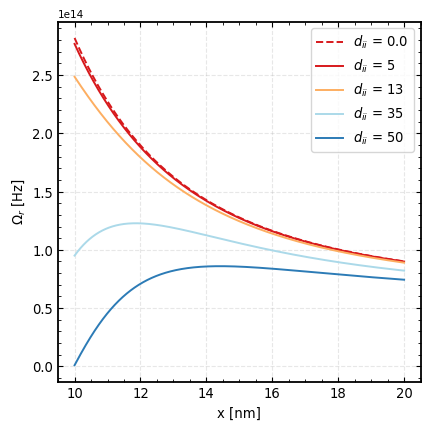

In [25]:
# r = 10 nm (saved version for document with plots)
cm = 1/2.54 #used for figure size
st = '$d_{ii}$' #used for plot labels
fig, ax = plt.subplots(1,1, figsize = (11*cm, 11*cm), layout = 'tight')
lss = ['--', 'solid', 'solid', 'solid', 'solid'] 
col = ['#d7191c', '#d7191c', '#fdae61', '#abd9e9', '#2c7bb6']
#Plot Rabi frequency as a function of distance from nanosphere for all d_ii_1 values of dperm
for q in range(5):
    ax.plot(r_arr1, omega5[q], label = f'{st} = {d_ii_1[q]}', color = col[q], ls = lss[q], linewidth = 1.4)
#Plotting style    
ax.set_xlabel('x [nm]', fontsize=9.5)
ax.set_ylabel('$\Omega_r$ [Hz]', fontsize=9.5)
ax.minorticks_on()
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.grid(alpha = 0.3, ls = '--')
ax.legend(fontsize=9.5)
# Save plot
plt.savefig(fname = f'rabi_freq_wrt_dperm_r_{r1*1e3:.0f}.jpg', format = 'jpg', dpi=800)
plt.show()

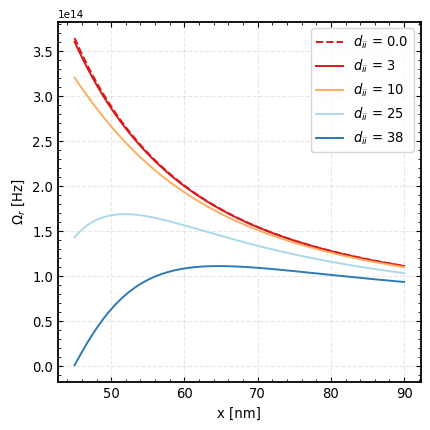

In [26]:
# r = 45 nm (saved version for document with plots)
cm = 1/2.54 #used for figure size
st = '$d_{ii}$'  #used for plot labels
fig, ax = plt.subplots(1,1, figsize = (11*cm, 11*cm), layout = 'tight')
lss = ['--', 'solid', 'solid', 'solid', 'solid']
#Plot Rabi frequency as a function of distance from nanosphere for all d_ii_1 values of dperm
for q in range(5):
    ax.plot(r_arr4, omega8[q], label = f'{st} = {d_ii_4[q]}', color = col[q], ls = lss[q], linewidth = 1.4)
#Plotting style    
ax.set_xlabel('x [nm]', fontsize=9.5)
ax.set_ylabel('$\Omega_r$ [Hz]', fontsize=9.5)
ax.minorticks_on()
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.grid(alpha = 0.3, ls = '--')
ax.legend(fontsize=9.5)
# Save plot
plt.savefig(fname = f'rabi_freq_wrt_dperm_r_{r4*1e3:.0f}.jpg', format = 'jpg', dpi=800)
plt.show()

### Coherence times

/tmp/ipykernel_393/2632776476.py:12: RuntimeWarning: divide by zero encountered in divide
  np.abs(1/((omega5[q]-omega5[q][np.where(omega5[q]==np.max(omega5[q]))])))/np.abs(1/((omega5[0]
/tmp/ipykernel_393/2632776476.py:12: RuntimeWarning: invalid value encountered in divide
  np.abs(1/((omega5[q]-omega5[q][np.where(omega5[q]==np.max(omega5[q]))])))/np.abs(1/((omega5[0]
/tmp/ipykernel_393/2632776476.py:19: RuntimeWarning: divide by zero encountered in divide
  np.abs(1/((omega8[q]-omega8[q][np.where(omega8[q]==np.max(omega8[q]))])))/np.abs(1/((omega8[0]
/tmp/ipykernel_393/2632776476.py:19: RuntimeWarning: invalid value encountered in divide
  np.abs(1/((omega8[q]-omega8[q][np.where(omega8[q]==np.max(omega8[q]))])))/np.abs(1/((omega8[0]


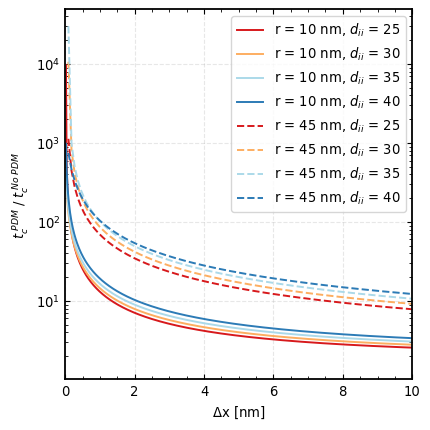

In [22]:
# Both of r = 10 nm and r = 45 nm on the same plot (THE APPROPRIATE DPERM VALUES MUST BE UNCOMMENTED 
#                                                  IN RABI FREQUENCY CALCULATIONS (otherwise plot doesn't look nice))
cm = 1/2.54 #used for figure size
st = '$d_{ii}$' #used for plot labels
fig, ax = plt.subplots(1,1, figsize = (11*cm, 11*cm), layout = 'tight')
lss1 = ['--', '--', '--', '--', '--']
lss2 = ['solid', 'solid', 'solid', 'solid', 'solid']
# Plot ratios of coherence time with PDM (4 different PDM values) to coherence time without PDM for both 
# r = 10 and r = 45 nm on the same plot
for q in range(1,5): # r = 10 nm
    ax.plot(2*(r_arr1-r_arr1[np.where(omega5[q]==np.max(omega5[q]))]), 
            np.abs(1/((omega5[q]-omega5[q][np.where(omega5[q]==np.max(omega5[q]))])))/np.abs(1/((omega5[0]
            -omega5[0][np.where(omega5[q]==np.max(omega5[q]))]))), 
            label = f'r = {r1*1e3:.0f} nm, {st} = {d_ii_1[q]}', 
            color = col[q], ls = lss2[q], linewidth = 1.4)

for q in range(1,5): # r = 45 nm
    ax.plot(2*(r_arr4-r_arr4[np.where(omega8[q]==np.max(omega8[q]))]), 
            np.abs(1/((omega8[q]-omega8[q][np.where(omega8[q]==np.max(omega8[q]))])))/np.abs(1/((omega8[0]
            -omega8[0][np.where(omega8[q]==np.max(omega8[q]))]))), 
            label = f'r = {r4*1e3:.0f} nm, {st} = {d_ii_4[q]}', 
            color = col[q], ls = lss1[q], linewidth = 1.4)
# Plotting style
ax.set_xlabel('$\Delta$x [nm]', fontsize=9.5)
ax.set_ylabel('$t^{\;PDM}_c\;/\;t^{\;No\;PDM}_c$', fontsize=9.5)
ax.minorticks_on()
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.grid(alpha = 0.3, ls = '--')
ax.legend(fontsize=9.5)
#ax.set_ylim([0,0.5e-10])
ax.set_xlim([0,10])
ax.set_yscale("log")
# Save plot
plt.savefig(fname = f'coherence_time_ratios.jpg', format = 'jpg', dpi=800)
plt.show()

/tmp/ipykernel_393/4247154339.py:11: RuntimeWarning: divide by zero encountered in divide
  1e9*np.abs(1/((omega5[q]-np.max(omega5[q])))), label = f'r = {r1*1e3:.0f} nm, {st} = {d_ii_1[q]}',
/tmp/ipykernel_393/4247154339.py:16: RuntimeWarning: divide by zero encountered in divide
  1e9*np.abs(1/((omega8[q]-np.max(omega8[q])))), label = f'r = {r4*1e3:.0f} nm, {st} = {d_ii_4[q]}',


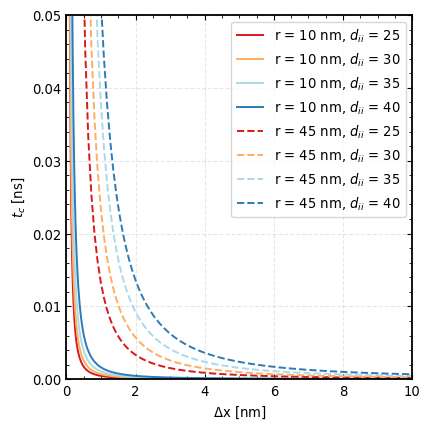

In [23]:
# r = 10 nm and r = 45 nm on the same plot (THE APPROPRIATE DPERM VALUES MUST BE UNCOMMENTED 
#                                           IN RABI FREQUENCY CALCULATIONS (otherwise plot doesn't look nice))
st = '$d_{ii}$' #used for plot labels
fig, ax = plt.subplots(1,1, figsize = (11*cm, 11*cm), layout = 'tight')
lss = ['--', 'solid', 'solid', 'solid', 'solid']
col2 = ['#f46d43', '#fb6a4a', '#fee090', '#e0f3f8', '#74add1']
# Plot coherence time as a function of distance from nanosphere for different PDM values. Range of x-axis must be
# small as Rabi freq assumed to be symmetric about its maximum for this range
for q in range(1,5): # r = 10 nm
    ax.plot(2*(r_arr1-r_arr1[np.where(omega5[q]==np.max(omega5[q]))]), 
            1e9*np.abs(1/((omega5[q]-np.max(omega5[q])))), label = f'r = {r1*1e3:.0f} nm, {st} = {d_ii_1[q]}', 
            color = col[q], ls = lss[q], linewidth = 1.4)
    
for q in range(1,5):  # r = 45 nm  
    ax.plot(2*(r_arr4-r_arr4[np.where(omega8[q]==np.max(omega8[q]))]), 
            1e9*np.abs(1/((omega8[q]-np.max(omega8[q])))), label = f'r = {r4*1e3:.0f} nm, {st} = {d_ii_4[q]}', 
            color = col[q], ls = lss1[q], linewidth = 1.4)
# Plotting style    
ax.set_xlabel('$\Delta$x [nm]', fontsize=9.5)
ax.set_ylabel('$t_c$ [ns]', fontsize=9.5)
ax.minorticks_on()
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.grid(alpha = 0.3, ls = '--')
ax.legend(fontsize=9.5)
ax.set_ylim([0,0.05])
ax.set_xlim([0,10])
# Save plot
plt.savefig(fname = f'coherence_times.jpg', format = 'jpg', dpi=800)
plt.show()

### Decay rates

In [27]:
m_gold_val1 = m_gold[np.where(ref_lam_gold == lam1)] #for decay rate f-ns, a single ref ind must be passed rather 
m_gold_val2 = m_gold[np.where(ref_lam_gold == lam2)] #than list
m_gold_val3 = m_gold[np.where(ref_lam_gold == lam3)]
m_gold_val4 = m_gold[np.where(ref_lam_gold == lam4)]

x_arr11 = np.linspace(1.2, 3.0, 100) * r1 * 1e3  #nm     # make new arrays with less values so that 
x_arr22 = np.linspace(1.0, 1.35, 100) * r2 * 1e3  #nm      subsequent f-ns run faster
x_arr33 = np.linspace(1.0, 4.2, 100) * r3 * 1e3  #nm
x_arr44 = np.linspace(1.2, 3.1, 100) * r4 * 1e3  #nm

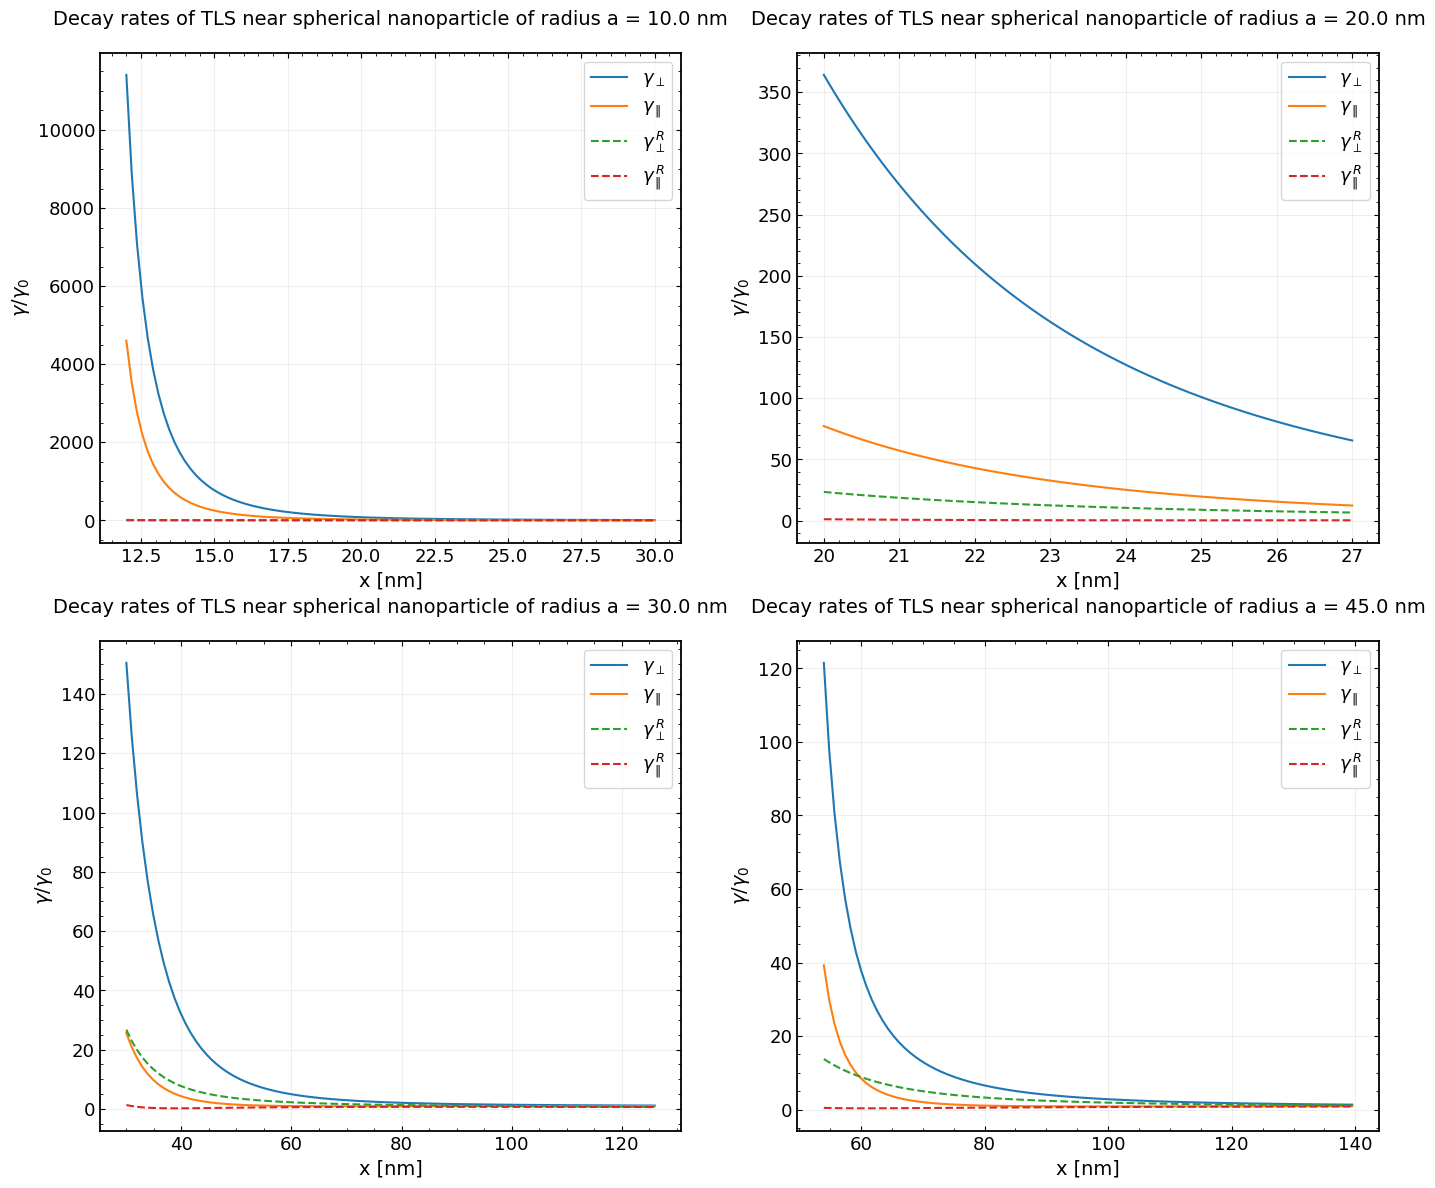

In [28]:
# Calculate decay rates for the different radii [r1...r4]. The rates relevant for the project are the gamma_norm_vals
A_list1, B_list1, gamma_norm_vals1, gamma_tang_vals1, gamma_norm_rad_vals1, gamma_tang_rad_vals1 = gamma_factors(
                                x_arr11*1e-9, m_gold_val1, lam_val = lam1*1e-6, r = r1*1e-6, n = 1, order = 20, 
                                plot = False, savefig = False, lim = False)
A_list2, B_list2, gamma_norm_vals2, gamma_tang_vals2, gamma_norm_rad_vals2, gamma_tang_rad_vals2 = gamma_factors(
                                x_arr22*1e-9, m_gold_val2, lam_val = lam2*1e-6, r = r2*1e-6, n = 1, order = 1, 
                                plot = False, savefig = False, lim = False)
A_list3, B_list3, gamma_norm_vals3, gamma_tang_vals3, gamma_norm_rad_vals3, gamma_tang_rad_vals3 = gamma_factors(
                                x_arr33*1e-9, m_gold_val3, lam_val = lam3*1e-6, r = r3*1e-6, n = 1, order = 1, 
                                plot = False, savefig = False, lim = False)
A_list4, B_list4, gamma_norm_vals4, gamma_tang_vals4, gamma_norm_rad_vals4, gamma_tang_rad_vals4 = gamma_factors(
                                x_arr44*1e-9, m_gold_val4, lam_val = lam4*1e-6, r = r4*1e-6, n = 1, order = 20, 
                                plot = False, savefig = False, lim = False)
# Store the enhancement of decay rates for plotting. Each array contains decay rates for all orientations of TLS 
# around nanosphere of given radius ri
plot_gammas1 = [gamma_norm_vals1, gamma_tang_vals1, gamma_norm_rad_vals1, gamma_tang_rad_vals1]
plot_gammas2 = [gamma_norm_vals2, gamma_tang_vals2, gamma_norm_rad_vals2, gamma_tang_rad_vals2]
plot_gammas3 = [gamma_norm_vals3, gamma_tang_vals3, gamma_norm_rad_vals3, gamma_tang_rad_vals3]
plot_gammas4 = [gamma_norm_vals4, gamma_tang_vals4, gamma_norm_rad_vals4, gamma_tang_rad_vals4]

# Plot decay rate enhancement
lss = ['solid', 'solid', '--', '--']
labels = ['$\gamma_{\perp}$', '$\gamma_{\, \|}$', '$\gamma^{\, R}_{\perp}$', '$\gamma^{\, R}_{\, \|}$']

fig, ax = plt.subplots(2,2, figsize = (16.5, 14))
for o in range(4):
    ax[0,0].plot(x_arr11, plot_gammas1[o], label = labels[o], ls = lss[o])
    ax[0,1].plot(x_arr22, plot_gammas2[o], label = labels[o], ls = lss[o])
    ax[1,0].plot(x_arr33, plot_gammas3[o], label = labels[o], ls = lss[o])  
    ax[1,1].plot(x_arr44, plot_gammas4[o], label = labels[o], ls = lss[o])
    
# Plotting style    
for v in range(2):
    for w in range(2):
        ax[v,w].set_xlabel('x [nm]', fontsize=14)
        ax[v,w].set_ylabel('$\gamma / \gamma_0$', fontsize=14)
        ax[v,w].minorticks_on()
        ax[v,w].tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=13)
        for axis in ['top','bottom','left','right']:
            ax[v,w].spines[axis].set_linewidth(1.3)
        ax[v,w].grid(alpha = 0.2)
        ax[v,w].legend(fontsize=13)
        
ax[0,0].set_title(f'Decay rates of TLS near spherical nanoparticle of radius a = {r1*10**3} nm', fontsize=14, \
            loc = 'center', wrap = True, pad=20)
ax[0,1].set_title(f'Decay rates of TLS near spherical nanoparticle of radius a = {r2*10**3} nm', fontsize=14, \
            loc = 'center', wrap = True, pad=20)
ax[1,0].set_title(f'Decay rates of TLS near spherical nanoparticle of radius a = {r3*10**3} nm', fontsize=14, \
            loc = 'center', wrap = True, pad=20)
ax[1,1].set_title(f'Decay rates of TLS near spherical nanoparticle of radius a = {r4*10**3} nm', fontsize=14, \
            loc = 'center', wrap = True, pad=20)

plt.show()

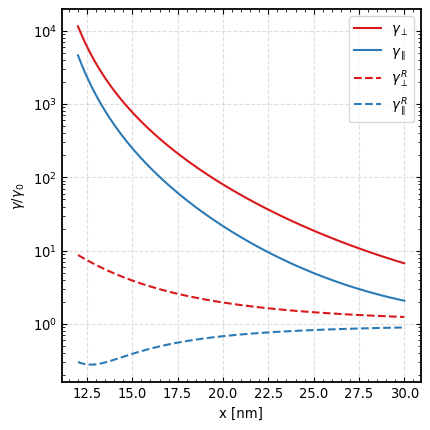

In [29]:
# Purcell effect, r = 10 nm; same plot as above but saved for document with plots
cm = 1/2.54 # used for figure size
fig, ax = plt.subplots(1,1, figsize = (11*cm, 11*cm), layout = 'tight')
col = ['#d7191c', '#2c7bb6', '#d7191c', '#2c7bb6']
lss = ['solid', 'solid', '--', '--']
# Plot decay rate enhancement
for o in range(4):
    ax.plot(x_arr11, plot_gammas1[o], label = labels[o], color = col[o], ls = lss[o])
    ax.set_yscale("log")
# Plotting style    
ax.set_xlabel('x [nm]', fontsize=9.5)
ax.set_ylabel('$\gamma / \gamma_0$', fontsize=9.5)
ax.minorticks_on()
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.grid(alpha = 0.4, ls = '--')
ax.legend(fontsize=9.5)
# Save plot
plt.savefig(fname = f'decay_rates_r_{r1*1e3:.0f}.jpg', format = 'jpg', dpi=800)
plt.show()

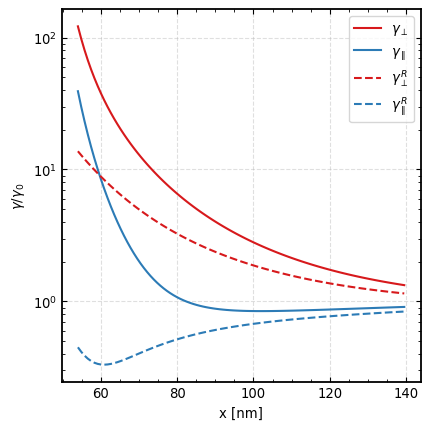

In [30]:
# Purcell effect, r = 45 nm; same plot as above but saved for document with plots
cm = 1/2.54 # used for figure size
fig, ax = plt.subplots(1,1, figsize = (11*cm, 11*cm), layout = 'tight')
col = ['#d7191c', '#2c7bb6', '#d7191c', '#2c7bb6']
# Plot decay rate enhancement
for o in range(4):
    ax.plot(x_arr44, plot_gammas4[o], label = labels[o], color = col[o], ls = lss[o])
    ax.set_yscale("log")
# Plotting style        
ax.set_xlabel('x [nm]', fontsize=9.5)
ax.set_ylabel('$\gamma / \gamma_0$', fontsize=9.5)
ax.minorticks_on()
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.grid(alpha = 0.4, ls = '--')
ax.legend(fontsize=9.5)
# Save plot
plt.savefig(fname = f'decay_rates_r_{r4*1e3:.0f}.jpg', format = 'jpg', dpi=800)
plt.show()

In [31]:
# Calculate full enhanced decay rates (Weisskopf-Wigner*enhancement*Bessel correction) for r = 10 and r = 45 nm
# respectively. gamma1 and gamma4 contain the Bessel correction, while gamma_np1 and gamma_np2 do not.
omega1, delta1, gamma1, gamma_np1, g_x1, g_I1, g_z1, w_c1, w_eg1 = constants(
m_gold, ref_lam_gold, lam_val = lam1, E_0 = E_0_fixed, r = r1, d_tr = 1.0, d_perm =d_ii_1[3],
om_eg = None, x_points = x_arr1, order = 1, plot = False, transformed_H = True)

omega4, delta4, gamma4, gamma_np4, g_x4, g_I4, g_z4, w_c4, w_eg4 = constants(
m_gold, ref_lam_gold, lam_val = lam4, E_0 = E_0_fixed, r = r4, d_tr = 1.0, d_perm =d_ii_4[4],
om_eg = None, x_points = x_arr4, order = 1, plot = False, transformed_H = True)
# Calculate Bessel correction (incorporated above but not returned by constants f-n)
j_factor1 = (sp.j0(g_z1/w_c1))**2
j_factor4 = (sp.j0(g_z4/w_c4))**2

15274116.93663875
14409755.38918175


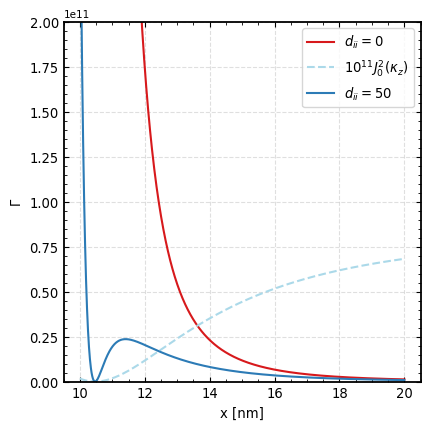

In [32]:
# Plot decay rates with and without Bessel correction for r = 10 nm
fig, ax = plt.subplots(1,1, figsize = (11*cm, 11*cm), layout = 'tight')
col = ['#d7191c', '#2c7bb6', '#abd9e9']
lss = ['solid', 'solid', '--']
labels = ['$d_{ii} = 0$', f'$d_{{ii}} = ${d_ii_1[4]}', '$10^{11}J_0^2(\kappa_z)$']

ax.plot(x_arr1, gamma_np1, label = labels[0], color = col[0], ls = lss[0])
ax.plot(x_arr1, 1e11*j_factor1, label = labels[2], color = col[2], ls = lss[2])
ax.plot(x_arr1, gamma1, label = labels[1], color = col[1], ls = lss[1])
# Plotting style
ax.set_ylim(0,2e11)
ax.set_xlabel('x [nm]', fontsize=9.5)
ax.set_ylabel('$\Gamma$', fontsize=9.5)
ax.minorticks_on()
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.grid(alpha = 0.4, ls = '--')
ax.legend(fontsize=9.5)
# Save plot
plt.savefig(fname = f'full_decay_rates_r_{r1*1e3:.0f}.jpg', format = 'jpg', dpi=800)
plt.show()

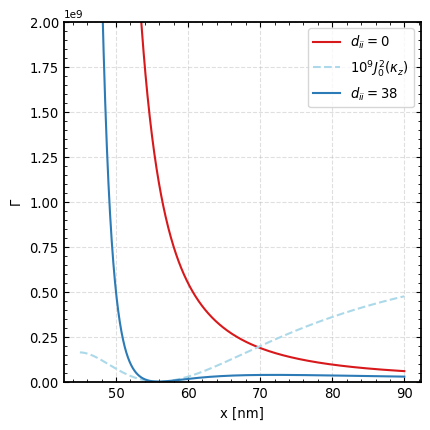

In [33]:
# Plot decay rates with and without Bessel correction for r = 10 nm
fig, ax = plt.subplots(1,1, figsize = (11*cm, 11*cm), layout = 'tight')
col = ['#d7191c', '#2c7bb6', '#abd9e9']
lss = ['solid', 'solid', '--']
labels = ['$d_{ii} = 0$', f'$d_{{ii}} = ${d_ii_4[4]}', '$10^{9}J_0^2(\kappa_z)$']

ax.plot(x_arr4, gamma_np4, label = labels[0], color = col[0], ls = lss[0])
ax.plot(x_arr4, 1e9*j_factor4, label = labels[2], color = col[2], ls = lss[2])
ax.plot(x_arr4, gamma4, label = labels[1], color = col[1], ls = lss[1])
# Plotting style
ax.set_ylim(0,2e9)
ax.set_xlabel('x [nm]', fontsize=9.5)
ax.set_ylabel('$\Gamma$', fontsize=9.5)
ax.minorticks_on()
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=9.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.grid(alpha = 0.4, ls = '--')
ax.legend(fontsize=9.5)
# Save plot
plt.savefig(fname = f'full_decay_rates_r_{r4*1e3:.0f}.jpg', format = 'jpg', dpi=800)
plt.show()

### Evolution of the TLS

qutip_integration() calculates evolution of systems positioned at x_points (must be array even if single point) over the timeframe [0,tf] After the calculation is complete, k1 and k2 are used to restrict the plotting data to the range from k1 $\times$ tf to k2 $\times$ tf. 

#### Original Hamiltonian

15274116.93663875
Omega 85589818231672.38 Delta 495904037652.0 Gamma 1560090713.8025565 Gamma_prime 1560090713.8025565
Omega 85960324298113.72 Delta 500207148735.0 Gamma 1713660920.4566433 Gamma_prime 1713660920.4566433
Omega 85678232179116.0 Delta 496929177607.0 Gamma 1712884924.6485486 Gamma_prime 1712884924.6485486


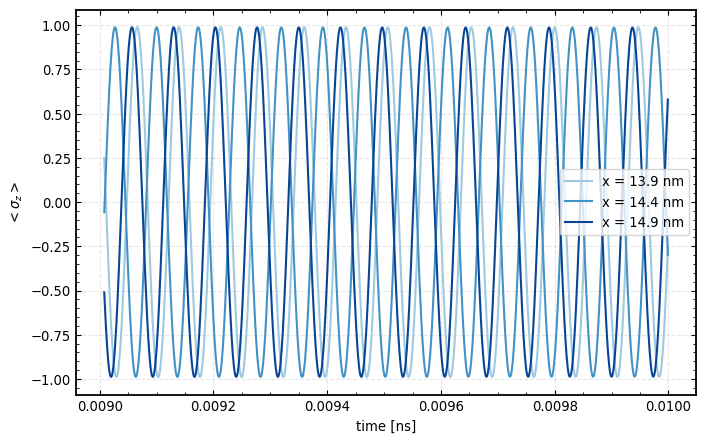

(array([0.000000e+00, 1.000001e-15, 2.000002e-15, ..., 9.999980e-10,
        9.999990e-10, 1.000000e-09]),
 array([-1.        , -0.99632845, -0.98534756, ...,  0.1226606 ,
         0.1422967 ,  0.16088897]))

In [34]:
qutip_integration(m_gold, ref_lam_gold, x_points = np.array([d_6[0]-0.5, d_6[0], d_6[0]+0.5]), 
                  d_perm = d_ii_1[4], E_0 = E_0_fixed, r = r1, lam_val = lam1, tf = 1e-9, transformed_H = True,
                  k1 = 0.009008, k2 = 0.01, numtimes = 1000000)

#### Transformed Hamiltonian

### r = 10 nm

15274116.93663875
Omega 85589818231672.38 Delta 495904037652.0 Gamma 1560090713.8025565 Gamma_prime 1560090713.8025565
Omega 85960324298113.72 Delta 500207148735.0 Gamma 1713660920.4566433 Gamma_prime 1713660920.4566433
Omega 85678232179116.0 Delta 496929177607.0 Gamma 1712884924.6485486 Gamma_prime 1712884924.6485486


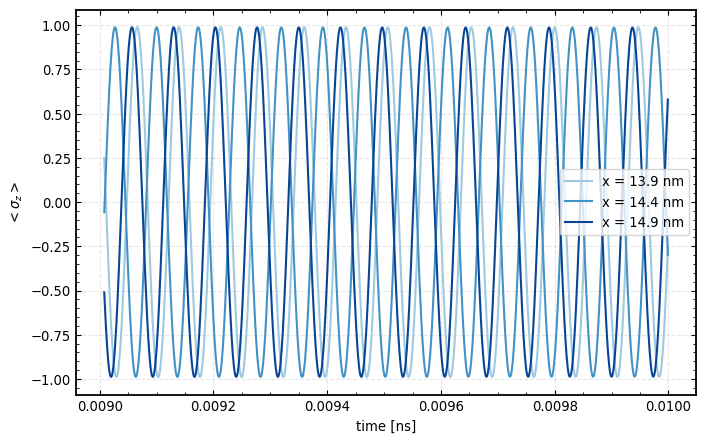

(array([0.000000e+00, 1.000001e-15, 2.000002e-15, ..., 9.999980e-10,
        9.999990e-10, 1.000000e-09]),
 array([-1.        , -0.99632845, -0.98534756, ...,  0.1226606 ,
         0.1422967 ,  0.16088897]))

In [35]:
qutip_integration(m_gold, ref_lam_gold, x_points = np.array([d_6[0]-0.5, d_6[0], d_6[0]+0.5]), 
                  d_perm = d_ii_1[4], E_0 = E_0_fixed, r = r1, lam_val = lam1, tf = 1e-9, transformed_H = True,
                  k1 = 0.009008, k2 = 0.01, numtimes = 1000000)

### r = 20 nm

14409755.38918175
Omega 93573624879240.67 Delta 604371754958.5 Gamma 183237316.3591051 Gamma_prime 183237316.3591051
Omega 93673926956976.8 Delta 605668257364.5 Gamma 192076957.13361025 Gamma_prime 192076957.13361025
Omega 93579236712163.22 Delta 604444231335.5 Gamma 196423025.66811302 Gamma_prime 196423025.66811302


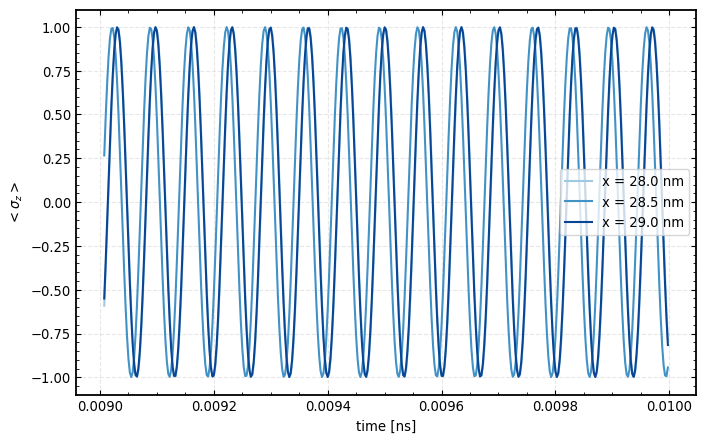

(array([0.00000000e+00, 2.50000625e-15, 5.00001250e-15, ...,
        9.99995000e-10, 9.99997500e-10, 1.00000000e-09]),
 array([-1.        , -0.97275765, -0.89251682, ..., -0.44220406,
        -0.59169151, -0.70894184]))

In [36]:
qutip_integration(m_gold, ref_lam_gold, x_points = np.array([d_8[0]-0.5, d_8[0], d_8[0]+0.5]), 
                  d_perm = d_ii_2[4], E_0 = E_0_fixed, r = r2, lam_val = lam2, tf = 1e-9, transformed_H = True,
                  k1 = 0.009008, k2 = 0.01, numtimes = 400000)

### r = 30 nm

14409755.38918175
Omega 105321705074133.17 Delta 765680509649.0 Gamma 84786560.23073183 Gamma_prime 84786560.23073183
Omega 105382020224702.36 Delta 766557853582.0 Gamma 88242215.74038105 Gamma_prime 88242215.74038105
Omega 105329947912012.64 Delta 765800344991.5 Gamma 90736412.12671302 Gamma_prime 90736412.12671302


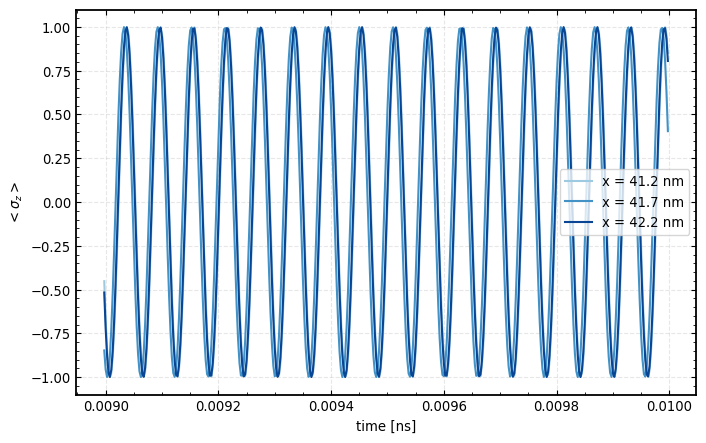

(array([0.00000000e+00, 2.50000625e-15, 5.00001250e-15, ...,
        9.99995000e-10, 9.99997500e-10, 1.00000000e-09]),
 array([-1.        , -0.96552929, -0.86449456, ..., -0.56638481,
        -0.36557314, -0.13956026]))

In [37]:
qutip_integration(m_gold, ref_lam_gold, x_points = np.array([d_10[0]-0.5, d_10[0], d_10[0]+0.5]), 
                  d_perm = d_ii_3[4], E_0 = E_0_fixed, r = r3, lam_val = lam3, tf = 1e-9, transformed_H = True,
                  k1 = 0.009, k2 = 0.01, numtimes = 400000)

### r = 45 nm

14409755.38918175
Omega 177778935624432.47 Delta 2182225612587.0 Gamma 323534204.64932024 Gamma_prime 323534204.64932024
Omega 175447280126738.34 Delta 2125334085868.0 Gamma 306529655.4639821 Gamma_prime 306529655.4639821
Omega 173183100322393.66 Delta 2070808995833.5 Gamma 290852023.7397879 Gamma_prime 290852023.7397879


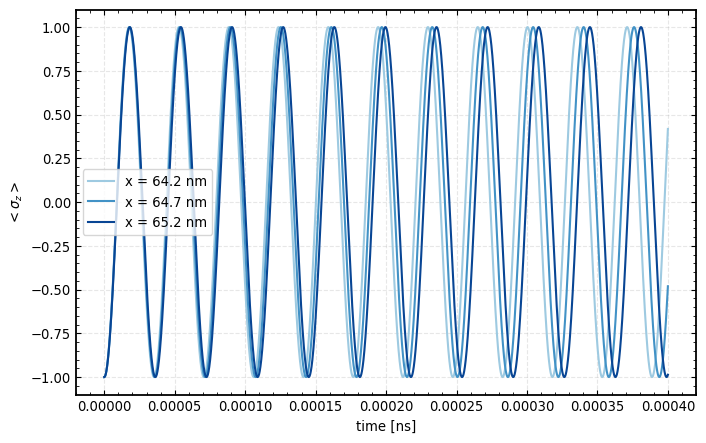

(array([0.000000e+00, 4.000004e-19, 8.000008e-19, ..., 3.999992e-13,
        3.999996e-13, 4.000000e-13]),
 array([-1.        , -1.        , -0.99999999, ..., -0.98663844,
        -0.9866272 , -0.98661596]))

In [38]:
qutip_integration(m_gold, ref_lam_gold, x_points = np.array([d_12[0]-0.5, d_12[0], d_12[0]+0.5]), 
                  d_perm = 0.0, E_0 = E_0_fixed, r = r4, lam_val = lam4, tf = 0.0004e-9, transformed_H = True,
                  k1 = 0.0, k2 = 1.0, numtimes = 1000000)

14409755.38918175
Omega 110905225070256.48 Delta 849030671147.0 Gamma 29514987.114549715 Gamma_prime 29514987.114549715
Omega 110927807038374.6 Delta 849376501762.0 Gamma 30662194.67741233 Gamma_prime 30662194.67741233
Omega 110904925368181.33 Delta 849026049555.5 Gamma 31693134.00184667 Gamma_prime 31693134.00184667


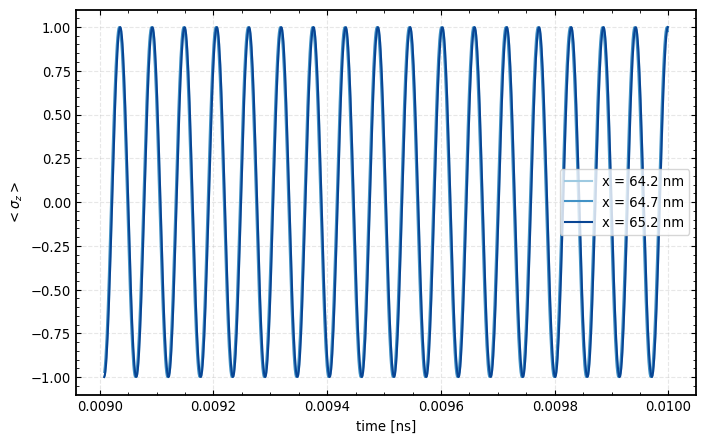

(array([0.000000e+00, 1.000001e-15, 2.000002e-15, ..., 9.999980e-10,
        9.999990e-10, 1.000000e-09]),
 array([-1.        , -0.99385629, -0.97550073, ...,  0.90442464,
         0.86921568,  0.82332509]))

In [39]:
qutip_integration(m_gold, ref_lam_gold, x_points = np.array([d_12[0]-0.5, d_12[0], d_12[0]+0.5]), 
                  d_perm = d_ii_4[4], E_0 = E_0_fixed, r = r4, lam_val = lam4, tf = 1e-9, transformed_H = True,
                  k1 = 0.009008, k2 = 0.01, numtimes = 1000000)

### r = 60 nm

14409755.38918175
Omega 49008025201747.555 Delta 165764761084.5 Gamma 4081295780.0897446 Gamma_prime 4081295780.0897446
Omega 53787396960980.18 Delta 199674192192.0 Gamma 2886450140.735481 Gamma_prime 2886450140.735481
Omega 58350622394427.89 Delta 234993078422.5 Gamma 2040372174.4046204 Gamma_prime 2040372174.4046204


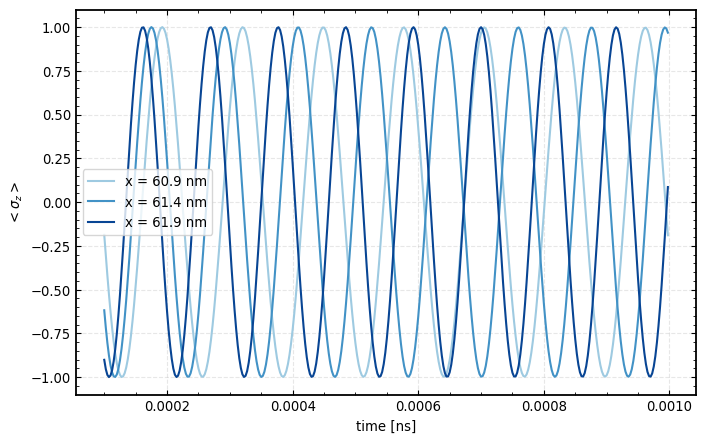

(array([0.00000000e+00, 2.50000625e-15, 5.00001250e-15, ...,
        9.99995000e-10, 9.99997500e-10, 1.00000000e-09]),
 array([-1.        , -0.98936869, -0.95772101, ..., -0.09772306,
        -0.12374672, -0.14714119]))

In [40]:
qutip_integration(m_gold, ref_lam_gold, x_points = np.array([d_14[0]-0.5, d_14[0], d_14[0]+0.5]), 
                  d_perm = d_ii_5[4], E_0 = E_0_fixed, r = r5, lam_val = lam5, tf = 1e-9, transformed_H = True,
                  k1 = 0.0001, k2 = 0.001, numtimes = 400000)

### Electric field distribution over y = 0 cross section

Full field (incident + scattered)

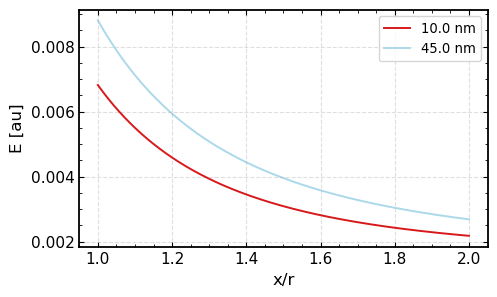

In [41]:
# plot field over y = 0 cross section
plot_E1 = []
plot_E4 = []
# r = 10 nm
for i in x_arr1:
    plot_E1.append(E_0_fixed*(scattered_field_absolute(i*1e-9, 0.0, 1e-15, m_gold, 
                                                     ref_lam_gold*1e-6, r1*1e-6, lam1*1e-6, 1)+1)) # in V/m
# r = 45 nm
for i in x_arr4:
    plot_E4.append(E_0_fixed*(scattered_field_absolute(i*1e-9, 0.0, 1e-15, m_gold, 
                                                     ref_lam_gold*1e-6, r4*1e-6, lam4*1e-6, 1)+1)) # in V/m
# Plot values (use x/r ratio so that both r1 and r4 values can be plotted on the same figure)
fig, ax = plt.subplots(1,1,figsize = (5,3), layout = 'tight')
ax.plot(x_arr1/(r1*1e3), plot_E1, color = '#d7191c', ls = 'solid', label = f'{r1*1e3} nm', linewidth = 1.4)
ax.plot(x_arr4/(r4*1e3), plot_E4, color = '#abd9e9', ls = 'solid', label = f'{r4*1e3} nm', linewidth = 1.4, 
        zorder = 0)
# Plotting style
ax.set_xlabel('x/r', fontsize=12)
ax.set_ylabel('E [au]', fontsize=12)
ax.minorticks_on()
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=11)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.grid(alpha = 0.4, ls = '--')
ax.legend(fontsize=9.5)
# Save plot    
plt.savefig(fname = f'field_cross_section_r_{r4*1e3:.0f}.jpg', format = 'jpg', dpi=800)
plt.show()